In [1]:
import pandas as pd

# 北海道の郵便番号 csv あらかじめ utf-8 に変換している

In [2]:
# ダメな例
df = pd.read_csv("hokkaido.csv")
df

,0600000,北海道,札幌市中央区,以下に掲載がない場合
0,640941,北海道,札幌市中央区,旭ケ丘
1,600041,北海道,札幌市中央区,大通東
2,600042,北海道,札幌市中央区,大通西（１～１９丁目）
3,640820,北海道,札幌市中央区,大通西（２０～２８丁目）
4,600031,北海道,札幌市中央区,北一条東
...,...,...,...,...
8246,861821,北海道,目梨郡羅臼町,緑町
8247,861751,北海道,目梨郡羅臼町,峯浜町
8248,861841,北海道,目梨郡羅臼町,八木浜町
8249,861822,北海道,目梨郡羅臼町,湯ノ沢町


In [3]:
# header=Noneとすると連番が列名columnsに割り当てられる
# ダメな例 郵便番号の頭の「0」が消えている
df = pd.read_csv("hokkaido.csv", header=None)
df

,0,1,2,3
0,600000,北海道,札幌市中央区,以下に掲載がない場合
1,640941,北海道,札幌市中央区,旭ケ丘
2,600041,北海道,札幌市中央区,大通東
3,600042,北海道,札幌市中央区,大通西（１～１９丁目）
4,640820,北海道,札幌市中央区,大通西（２０～２８丁目）
...,...,...,...,...
8247,861821,北海道,目梨郡羅臼町,緑町
8248,861751,北海道,目梨郡羅臼町,峯浜町
8249,861841,北海道,目梨郡羅臼町,八木浜町
8250,861822,北海道,目梨郡羅臼町,湯ノ沢町


In [4]:
# 良い例
# ヘッダーがないので読み込み時にname=でつける
# 郵便番号の頭の「0」が消えないように、最初はすべてobjectで読む
df = pd.read_csv("hokkaido.csv", names=("postcode", "pref", "city", "address"), dtype="object")
df

,postcode,pref,city,address
0,0600000,北海道,札幌市中央区,以下に掲載がない場合
1,0640941,北海道,札幌市中央区,旭ケ丘
2,0600041,北海道,札幌市中央区,大通東
3,0600042,北海道,札幌市中央区,大通西（１～１９丁目）
4,0640820,北海道,札幌市中央区,大通西（２０～２８丁目）
...,...,...,...,...
8247,0861821,北海道,目梨郡羅臼町,緑町
8248,0861751,北海道,目梨郡羅臼町,峯浜町
8249,0861841,北海道,目梨郡羅臼町,八木浜町
8250,0861822,北海道,目梨郡羅臼町,湯ノ沢町


In [5]:
df.shape

(8252, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8252 entries, 0 to 8251
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   postcode  8252 non-null   object
 1   pref      8252 non-null   object
 2   city      8252 non-null   object
 3   address   8252 non-null   object
dtypes: object(4)
memory usage: 258.0+ KB


In [7]:
# 名寄市を取得
df[df["city"]=="名寄市"]

,postcode,pref,city,address
2864,0960000,北海道,名寄市,以下に掲載がない場合
2865,0960075,北海道,名寄市,曙
2866,0960061,北海道,名寄市,朝日
2867,0960010,北海道,名寄市,大通南
2868,0960030,北海道,名寄市,大通北
...,...,...,...,...
2937,0980504,北海道,名寄市,風連町本町
2938,0960072,北海道,名寄市,豊栄
2939,0960077,北海道,名寄市,瑞穂
2940,0960063,北海道,名寄市,緑丘


In [8]:
# 文字列部分一致
df[df["address"].str.contains("恵み野")][["city", "address"]]

,city,address
3510,恵庭市,恵み野東
3511,恵庭市,恵み野西
3512,恵庭市,恵み野南
3513,恵庭市,恵み野北
3514,恵庭市,恵み野里美


In [9]:
# 札幌市東区東苗穂
# 1列なのでSeries型
df[(df["city"]=="札幌市東区") & (df["address"].str.startswith("東苗穂"))]["address"]

321     東苗穂一条
322     東苗穂二条
323     東苗穂三条
324     東苗穂四条
325     東苗穂五条
326     東苗穂六条
327     東苗穂七条
328     東苗穂八条
329     東苗穂九条
330     東苗穂十条
331    東苗穂十一条
332    東苗穂十二条
333    東苗穂十三条
334    東苗穂十四条
335    東苗穂十五条
336      東苗穂町
Name: address, dtype: object

In [10]:
# 札幌市だけ抽出して別のデータフレームに代入
sapporo = df[df["city"].str.startswith("札幌市")]
sapporo

,postcode,pref,city,address
0,0600000,北海道,札幌市中央区,以下に掲載がない場合
1,0640941,北海道,札幌市中央区,旭ケ丘
2,0600041,北海道,札幌市中央区,大通東
3,0600042,北海道,札幌市中央区,大通西（１～１９丁目）
4,0640820,北海道,札幌市中央区,大通西（２０～２８丁目）
...,...,...,...,...
818,0040878,北海道,札幌市清田区,平岡八条
819,0040879,北海道,札幌市清田区,平岡九条
820,0040880,北海道,札幌市清田区,平岡十条
821,0040881,北海道,札幌市清田区,平岡公園


In [11]:
# グループ化
g = sapporo.groupby("city")

In [12]:
g.count()

,postcode,pref,address
city,,,
札幌市中央区,89,89,89
札幌市北区,143,143,143
札幌市南区,98,98,98
札幌市厚別区,39,39,39
札幌市手稲区,72,72,72
札幌市東区,122,122,122
札幌市清田区,51,51,51
札幌市白石区,72,72,72
札幌市西区,82,82,82


<AxesSubplot:xlabel='city'>

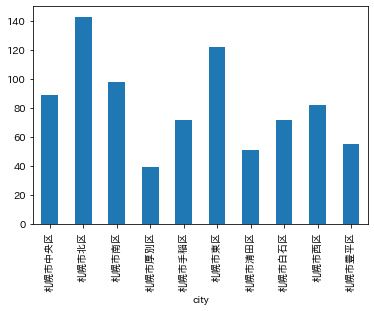

In [13]:
# 下のインポートで日本語は文字化けしない
import japanize_matplotlib

g["address"].count().plot(kind="bar")